## **Exploratory Data Analysis**

In [1]:
import os 
import sys

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 
import plotly.graph_objects as go 

from collections import Counter 
import json 

with open("config.json", "r") as json_file:
    cfg = json.load(json_file)

from nltk.corpus import stopwords

import re 

In [2]:
CAPTIONS_FILE = cfg["paths"]["captions_file"]
data = pd.read_csv(CAPTIONS_FILE)
data.head()

,image,caption
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...


In [3]:
text_data = [string.lower() for string in list(data.caption)]

### **Captions length histogram**

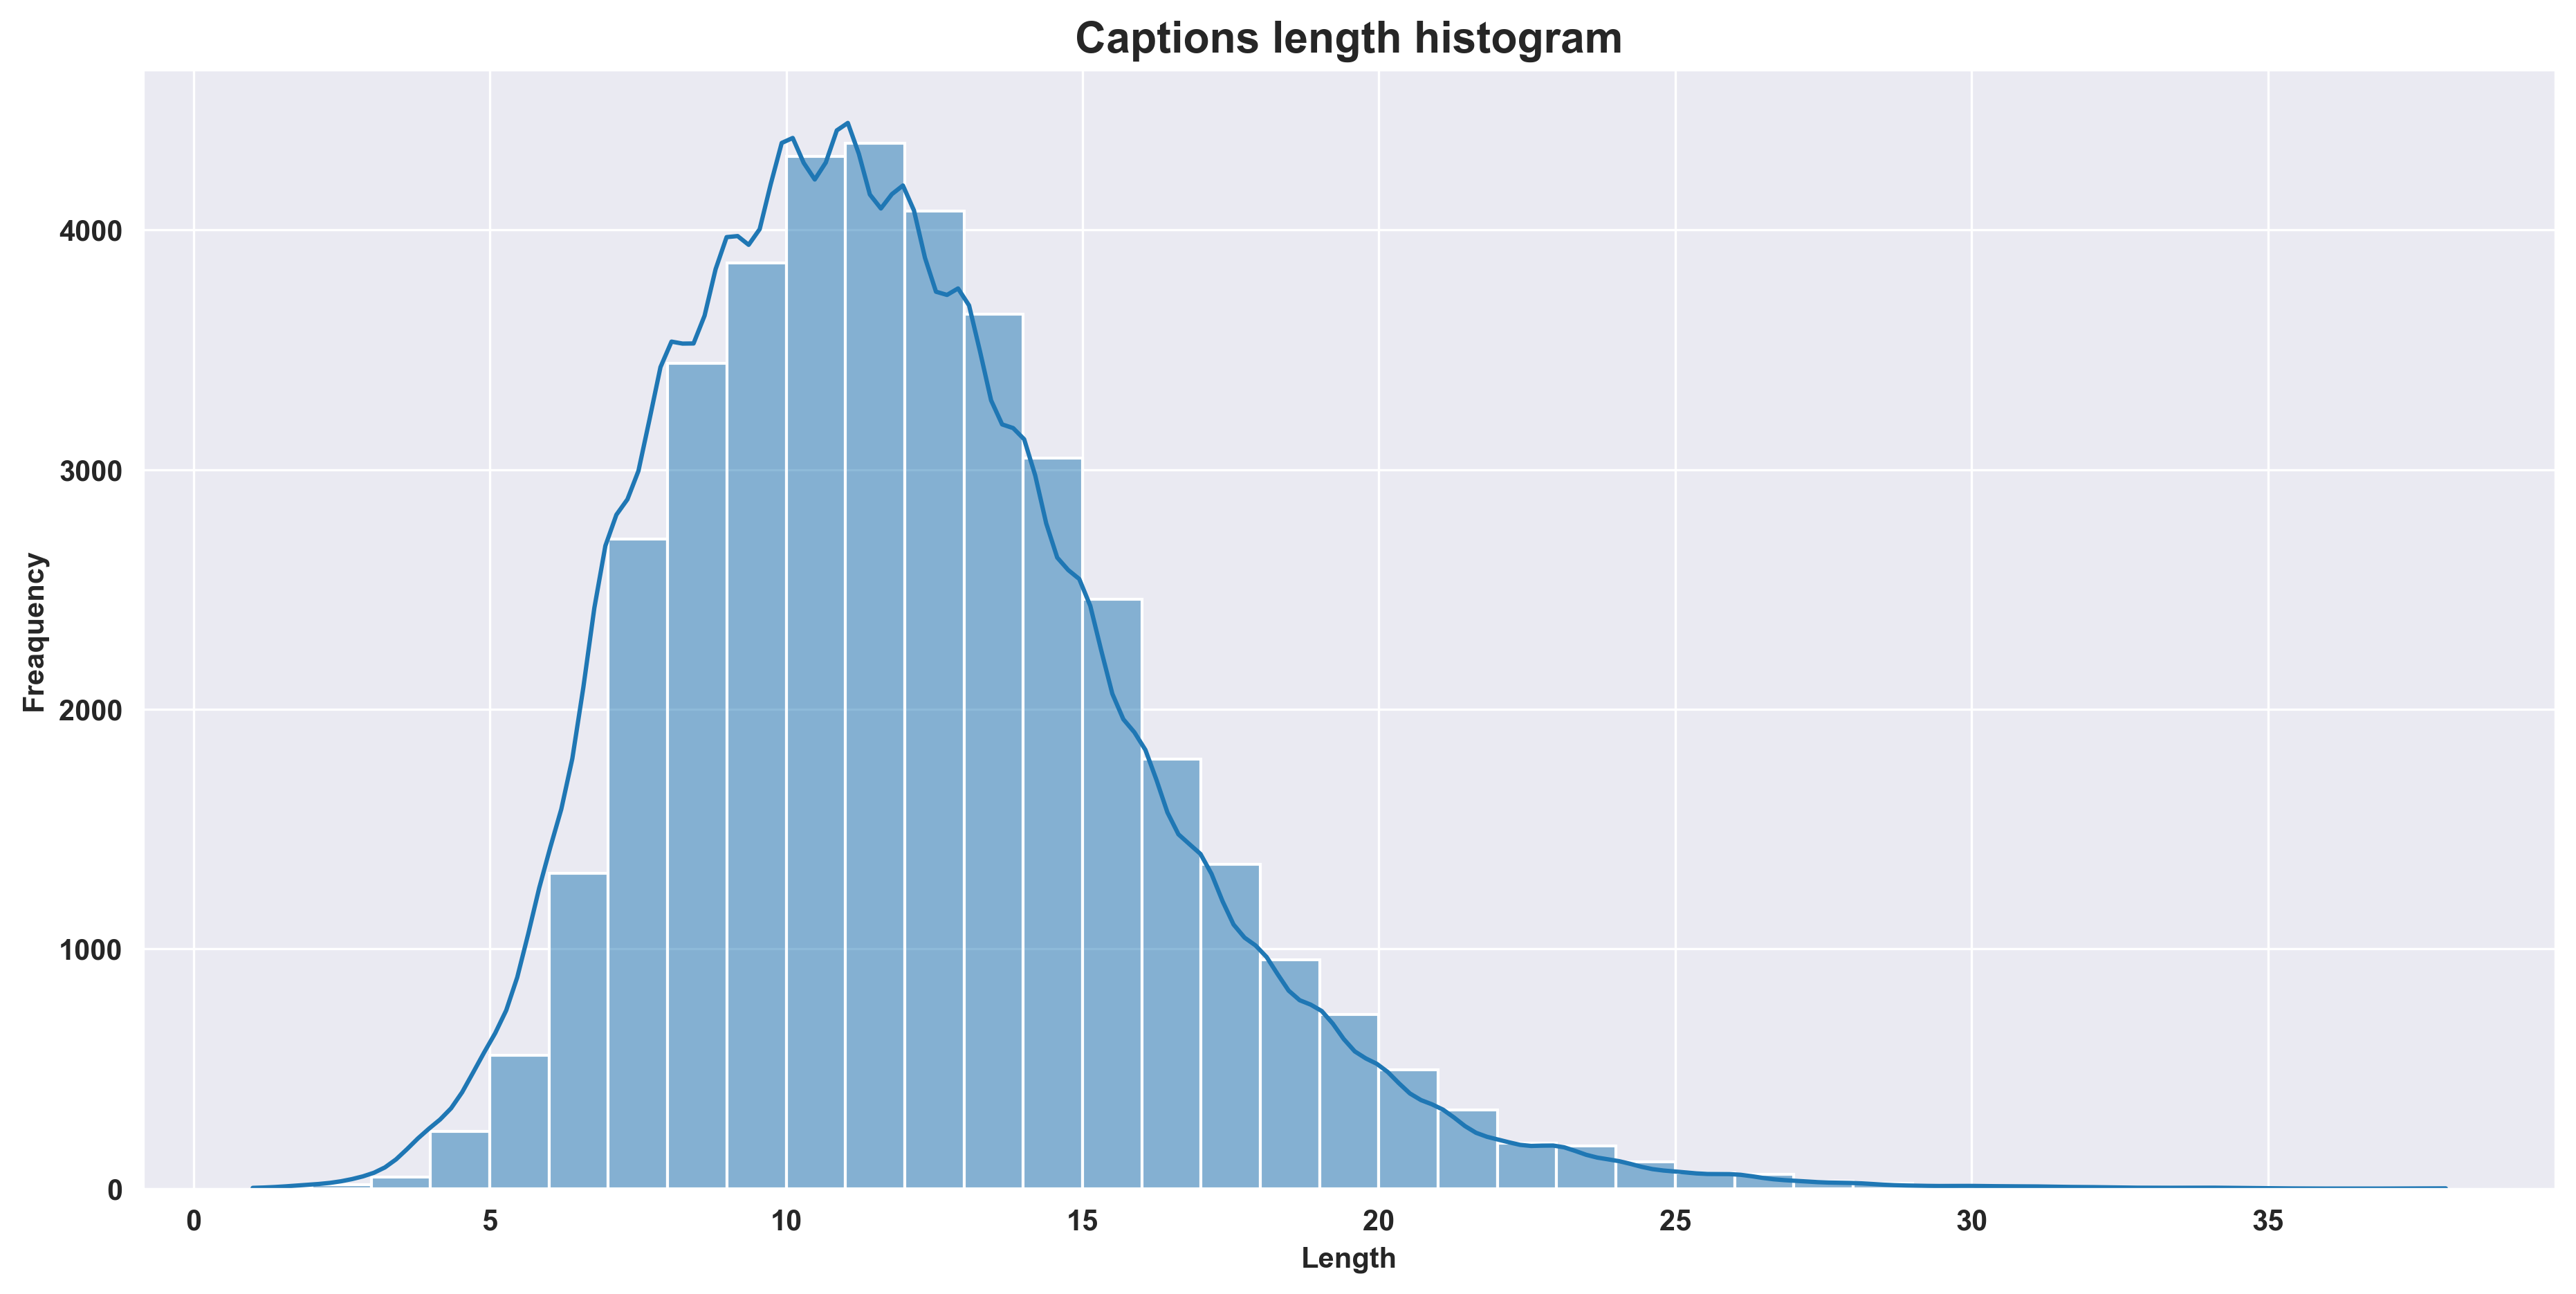

In [4]:
def captions_length(data):
    plt.figure(figsize=(15, 7), dpi=300)
    sns.set_style('darkgrid')
    sns.histplot(x=[len(x.split(' ')) for x in data], kde=True, binwidth=1) 
    plt.title('Captions length histogram', fontsize=15, fontweight='bold')
    plt.xticks(fontweight='bold')
    plt.yticks(fontweight='bold')
    plt.xlabel('Length', fontweight='bold')
    plt.ylabel('Freaquency', fontweight='bold')
    plt.show()
    
captions_length(text_data)


In [5]:
stop_words = set(stopwords.words('english'))
def custom_standardization(input_string):
    lowercase = input_string.lower()
    # Characters to remove
    strip_chars = "!\"#$%&'()*+,-./:;=?@[\\]^_`{|}~1234567890"
    return re.sub(f"[{re.escape(strip_chars)}]", "", lowercase)

def remove_stopwords_in_sentence(sentence):
    sentence = custom_standardization(sentence)
    filtered_sentence = []
    words = sentence.split()
    for word in words: 
        if word not in stop_words: 
           filtered_sentence.append(word)
    
    return filtered_sentence

def remove_stopwords(data):
    res = []
    for sentence in data: 
        filtered_sentence = remove_stopwords_in_sentence(sentence)  
        res.extend(filtered_sentence)
    
    return res 


In [6]:
all_text = remove_stopwords(text_data)
word_freq = Counter(all_text)
sorted(list(word_freq.items()), key=lambda x: x[1], reverse=True)[:10]

[('dog', 8136),
 ('man', 7265),
 ('two', 5638),
 ('white', 3940),
 ('black', 3832),
 ('boy', 3581),
 ('woman', 3402),
 ('girl', 3328),
 ('wearing', 3062),
 ('people', 2883)]

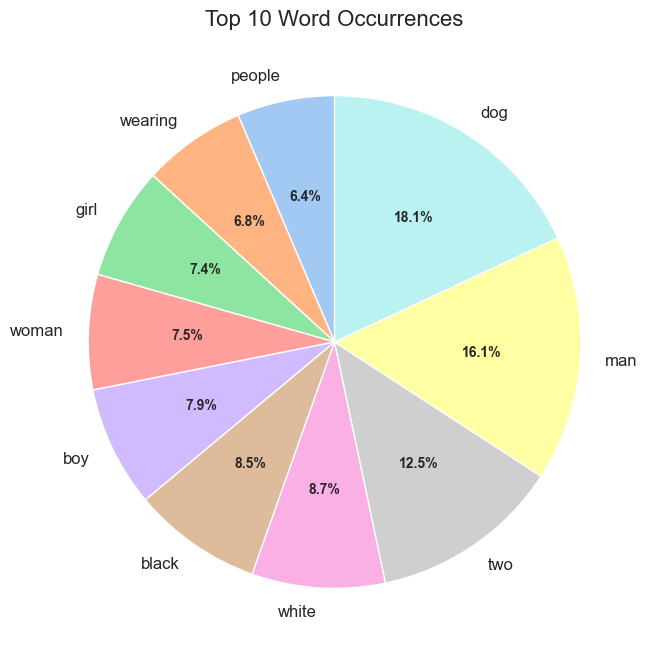

In [7]:
def plot_top_words_pie_chart(word_freq):
    """
    Plots a pie chart for the top 20 words in the given frequency dictionary using seaborn for consistent colors.

    :param word_freq: Dictionary of word frequencies {word: frequency}
    """
    # Sort the dictionary by frequency and get the top 20 words
    sorted_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:10][::-1]

    # Split the keys (words) and values (frequencies)
    words, frequencies = zip(*sorted_words)

    # Generate a color palette
    colors = sns.color_palette("pastel", len(words))

    # Plot the pie chart
    plt.figure(figsize=(10, 8))
    wedges, texts, autotexts = plt.pie(
        frequencies, labels=words, autopct='%1.1f%%', startangle=90, colors=colors,
        textprops={'fontsize': 12}
    )
    plt.setp(autotexts, size=10, weight="bold")
    plt.title('Top 10 Word Occurrences', fontsize=16)
    # plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

plot_top_words_pie_chart(word_freq)
